<center>
    <h1>CREDIT RISK ANALYTICS</h1>
</center>

**Credit risk analysis** is a form of analysis performed by a credit analyst to determine a borrower's ability to meet their debt obligations. The purpose of credit analysis is to determine the creditworthiness of borrowers by quantifying the risk of loss that the lender is exposed to. <br/><br/>
**Credit risk modeling** is a technique used by lenders to determine the level of credit risk associated with extending credit to a borrower. Credit risk analysis models can be based on either financial statement analysis, default probability, or machine learning. <br/><br/>
**Advantages of Credit Risk Management:**
*   Ability to measure and predict the risks of any single application.
*   Allows banks planning strategies ahead to avoid a negative outcome.
*   Using various credit scoring models, it's possible to figure out the best ones for the business and determine the level of risk while lending.




### Import Libraries & Packages

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
plt.style.use("seaborn")

In [5]:
#for machine learning

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

### Data processing

In [6]:
#   Loading Dataset from github repo
#   which are collected non authorized party
#   its a demo project

data = "https://github.com/mdimran1/Dataset/blob/main/Bank%20Loan/bankloans.csv?raw=true"

bankloans = pd.read_csv(data)

In [7]:
bankloans.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [8]:
bankloans.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [9]:
#number of observations and features
bankloans.shape

(850, 9)

In [10]:
#data types in the dataframe
bankloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


<big>
- Checking for missing values

In [11]:
#check for number of missing values
bankloans.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [12]:
#Segregating the numeric and categorical variable names

numeric_var_names = [key for key in dict(bankloans.dtypes) if dict(bankloans.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
catgorical_var_names = [key for key in dict(bankloans.dtypes) if dict(bankloans.dtypes)[key] in ['object']]


In [13]:
numeric_var_names

['age',
 'ed',
 'employ',
 'address',
 'income',
 'debtinc',
 'creddebt',
 'othdebt',
 'default']

In [14]:
#splitting the data set into two sets - existing customers and new customers

bankloans_existing = bankloans.loc[bankloans.default.isnull() == 0]
bankloans_new = bankloans.loc[bankloans.default.isnull() == 1]

In [15]:
bankloans_existing.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


<big>
    - Checking for Outliers

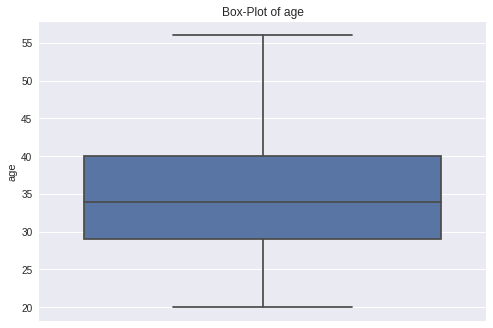

In [16]:
sns.boxplot(y = "age",data=bankloans_existing)
plt.title("Box-Plot of age")
plt.show()

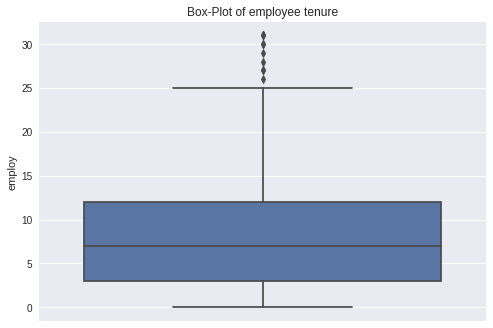

In [17]:
sns.boxplot(y = "employ",data=bankloans_existing)
plt.title("Box-Plot of employee tenure")
plt.show()

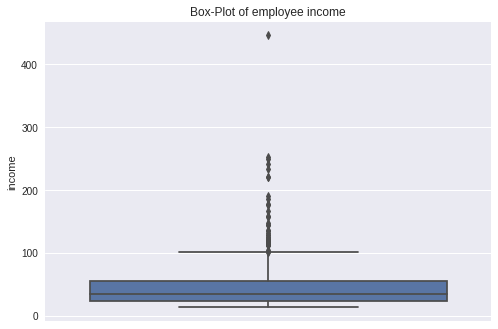

In [18]:
sns.boxplot(y = "income",data=bankloans_existing)
plt.title("Box-Plot of employee income")
plt.show()

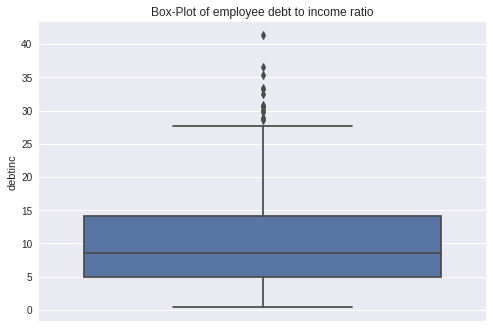

In [19]:
sns.boxplot(y = "debtinc",data=bankloans_existing)
plt.title("Box-Plot of employee debt to income ratio")
plt.show()

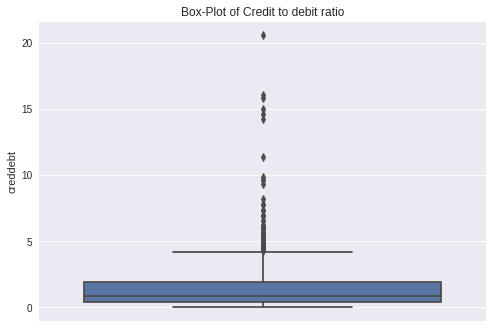

In [20]:
sns.boxplot(y = "creddebt",data=bankloans_existing)
plt.title("Box-Plot of Credit to debit ratio")
plt.show()

In [21]:
income_minlimit = bankloans_existing["income"].quantile(0.75) + 1.5 * (bankloans_existing["income"].quantile(0.75) - bankloans_existing["income"].quantile(0.25))
income_minlimit

101.5

In [22]:
# clip(upper=limit)

def outlier_capping(x):
    """A funtion to remove and replace the outliers for numerical columns"""
    x = x.clip(upper=income_minlimit)
    
    return(x)

In [23]:
#outlier treatment
bankloans_existing = bankloans_existing.apply(lambda x: outlier_capping(x))

In [24]:
##Correlation Matrix
bankloans_existing.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.022325,0.536497,0.597591,0.560951,0.016398,0.295207,0.340217,-0.137657
ed,0.022325,1.000000,-0.153621,0.056919,0.204394,0.008838,0.088274,0.165459,0.114676
employ,0.536497,-0.153621,1.000000,0.322334,0.725733,-0.031182,0.403694,0.406091,-0.282978
address,0.597591,0.056919,0.322334,1.000000,0.353754,0.011323,0.208435,0.226514,-0.164451
income,0.560951,0.204394,0.725733,0.353754,1.000000,-0.008606,0.514800,0.597798,-0.129385
debtinc,0.016398,0.008838,-0.031182,0.011323,-0.008606,1.000000,0.501767,0.584870,0.389575
creddebt,0.295207,0.088274,0.403694,0.208435,0.514800,0.501767,1.000000,0.633104,0.244740
othdebt,0.340217,0.165459,0.406091,0.226514,0.597798,0.584870,0.633104,1.000000,0.145713
default,-0.137657,0.114676,-0.282978,-0.164451,-0.129385,0.389575,0.244740,0.145713,1.000000


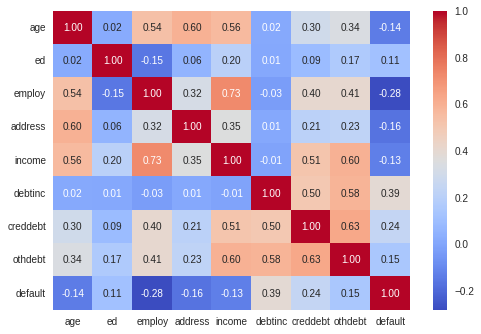

In [25]:
#Visualize the correlation using seaborn heatmap

sns.heatmap(bankloans_existing.corr(),annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()

In [26]:
bankloans_existing.shape

(700, 9)

In [27]:
bankloans_new.shape

(150, 9)

In [28]:
#Indicator variable unique types

bankloans_existing['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

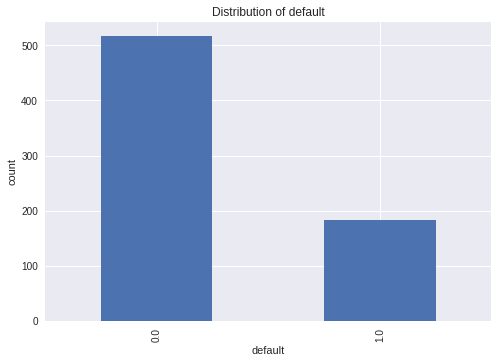

In [29]:
bankloans_existing['default'].value_counts().plot.bar()
plt.xlabel("default")
plt.ylabel("count")
plt.title("Distribution of default")
plt.show()

In [30]:
#percentage of unique types in indicator variable

round(bankloans_existing['default'].value_counts()/bankloans_existing.shape[0] * 100,3)

0.0    73.857
1.0    26.143
Name: default, dtype: float64

In [31]:
# Downloading csv file for further uses


bankloans_existing.to_csv('cleaned_existing.csv')
bankloans_new.to_csv("cleaned_new.csv")